<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kernel-Density-estimates" data-toc-modified-id="Kernel-Density-estimates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kernel Density estimates</a></span><ul class="toc-item"><li><span><a href="#Nonparametric-Density-Estimation" data-toc-modified-id="Nonparametric-Density-Estimation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nonparametric Density Estimation</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Kernel-Estimator" data-toc-modified-id="Kernel-Estimator-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Kernel Estimator</a></span></li><li><span><a href="#Nearest-Neighbors" data-toc-modified-id="Nearest-Neighbors-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Nearest Neighbors</a></span></li></ul></li><li><span><a href="#Multivariate-density-estimation" data-toc-modified-id="Multivariate-density-estimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multivariate density estimation</a></span></li><li><span><a href="#Classfication-using-density-estimations" data-toc-modified-id="Classfication-using-density-estimations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Classfication using density estimations</a></span></li></ul></li></ul></div>

# Kernel Density estimates
## Nonparametric Density Estimation
In the previous chapters, we have been doing what is known as parametric methods, i.e we have assumed some paramter or model our data has come from and fitting to gain some paramter. However if the assumption of the model is not a good assumption then you won't get a good result. There are also things known as semi-parametric models, which is made up of many small parametric models(Like gaussian mixture models), which I will discuss later, to counter for this.


### Histogram

Nonparametric methods is simply building model based entriely on the data it's self, rather than reliying on any underlying model. One example of this is is typical histogram which estatimes the density function based on number of data points in a certain box or bin of certain width h. In the end with have some probaility distrubtion:

$$p(x) = \frac{\text{Number x points falling in this bin}}{Nh} $$

where N is the number of data points. Our density estimation can vary quite a lot depending on this width as seen in the example below.



In [2]:
from sklearn import datasets
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

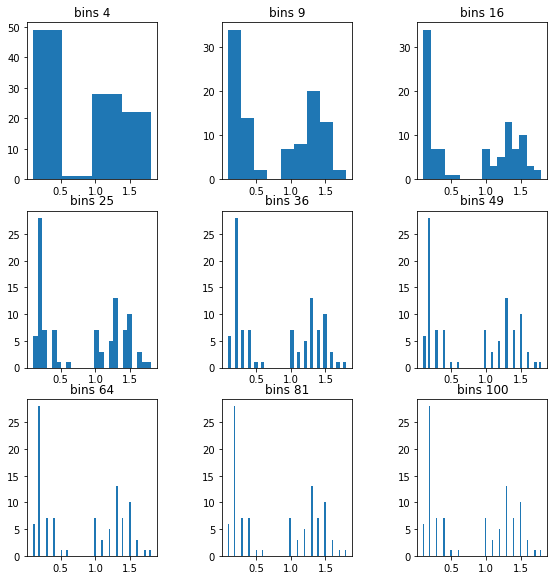

In [6]:
iris = datasets.load_iris()
#only the first feature and 2 different samples
X=iris.data[:, 3]
Y=iris.target
X=X[Y!=2] 


fig, axes = plt.subplots(3,3,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2,wspace=0.5)
#increase bins of power of 2
num_bins = [ x**2 for x in range(2,len(axes.ravel())+2) ]

#Plot Histogram of varying number of bins
#this changes bin width
for ax,bN in zip(axes.ravel(),num_bins):
	ax.hist(X, bins=bN)
	ax.set_title("bins {}".format(bN))



As you can see if you make you width too much then you don't have a very good estimation and just have a bar at each data point. To large a width and just get a giant blob. 


### Kernel Estimator
There are improvments in the histogram such as the naive estimator which uses a window function:

$$ p(x) = \frac{1}{Nh} \sum_i^N w(\frac{x-x_i}{h})$$

where the window function w equals:

$$ w(a) = \begin{cases}
    1,& \text{if } |a| < 1/2 \\
    0,              & \text{otherwise}
\end{cases}$$

Here it checks a point x and then sums up all the surround points which is close enough to it by some distance. This however is still very discontious density function. If we replace the window function by some kernal K, we can obtain smoother density estimators:


$$ p(x) = \frac{1}{Nh} \sum_i^N K(\frac{x-x_i}{h})$$


where for example we can use a gaussian kernal:

$$K(a) = \frac{1}{\sqrt{2\pi}}exp(-\frac{a^2}{2}) $$

Using this we can plot a new density estimation with varying width length.

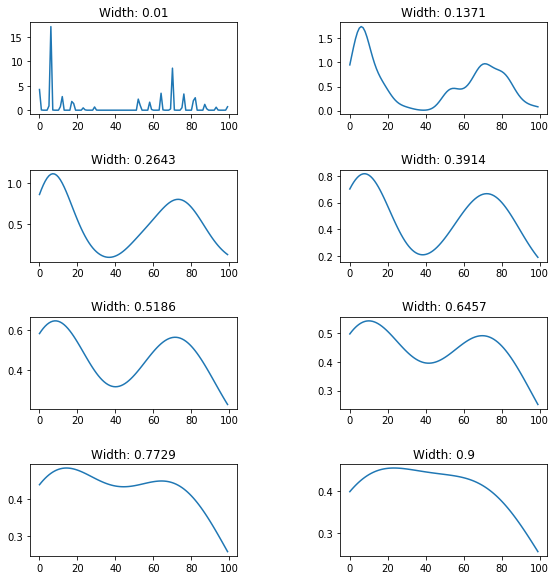

In [14]:
#now try with  kernal
from scipy.stats import gaussian_kde
#can also import sklearn.neighbors.kernel density
x = np.linspace(min(X), max(X),100)
 
#Varying length of gaussian kernals
width = np.linspace(min(X)*0.1, max(X)*0.5,8);


fig, axes = plt.subplots(4,2,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.6,wspace=0.5)


for ax,h in zip(axes.ravel(),width):
    kmodel = gaussian_kde(X,h)
    pdfmodel = kmodel(x)
    ax.plot(pdfmodel)
    ax.set_title("Width(h): {}".format(round(h,4)))

As it can seen the desntiy estimation is a lot smoother than a histogram. Again though care must be made with the width or can give very wrong estimation. We can check how good this kernal estimation is or how good varying width of kernals are by comparing the built model with the actual model using entopy formula or what is known as the KL divergence:

KL Divergence1 0.0245727614623
KL Divergence2 0.0805969687244


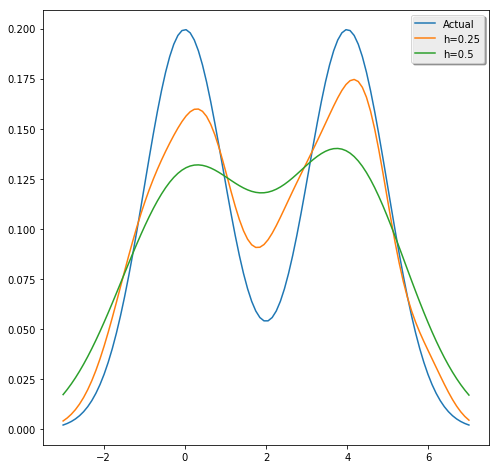

In [18]:
from scipy.stats import entropy
from scipy.stats import norm

#make training data for model building
#one set of data gaussian with 0 mean and std 1 
#second gaus of mean 4 and std 1
G1 = np.append(np.random.normal(0, 1, 50), np.random.normal(4,1, 50))

#Set up  data points
x=np.linspace(-3, 7,100)

#Make actually gaussian model of data
M = 0.5*norm.pdf(x,0,1) + 0.5*norm.pdf(x,4,1)

#kernal estimate length 0.25 and 0.5
kmodelout = gaussian_kde(G1,0.25)(x)
kmodelout2 = gaussian_kde(G1,0.5)(x)

print("KL Divergence1", entropy(M,kmodelout))
print("KL Divergence2", entropy(M,kmodelout2))

fig, axes = plt.subplots(figsize=(8, 8))
real, = axes.plot(x,M, label = "Actual")
pdict1, = axes.plot(x,kmodelout, label = "h=0.25" )
pdict2, = axes.plot(x,kmodelout2, label = "h=0.5")
axes.legend(handles = [real, pdict1,pdict2],loc='upper right', shadow=True)

Close, espeically for something which is building from random data. There are many other kernal function I recommend looking up the kernal density estimation package in sklearn. They have them all and also lots of other optomizations.

### Nearest Neighbors


## Multivariate density estimation




## Classfication using density estimations